PAR.COL.NAMES <- c("Time", "CBFVR", "ABP", "CBFVL", "ETCO2", "CrCPR", "RAPR",
                   "HR", "SBP", "DBP", "PINXR", "MSER", "CrCPL", "RAPL",
                   "SCBFVR", "DCBFVR", "SCBFVL", "DCBFVL", "PINXL", "MSEL")
PAR.USED.COL.NAMES <- c(PAR.COL.NAMES[1], PAR.COL.NAMES[3],
                        PAR.COL.NAMES[5], PAR.COL.NAMES[2])

CBFVR Cerebral blood flow velocity right
ABP Arterial blood pressure
CBFVL Cerebral blood flow velocity left
ETCO2 end-tidal CO2
CrCPR Critical closing pressure right
RAPR resitance area-product right
HR heart rate
SBP Systolic bloop pressure
DBP Dyastolic bloop pressure
PINXR Pulsatil index right?
MSER Mean Squared Error right
CrCPR Critical closing pressure left
RAPR resitance area-product left

In [79]:
#import rpy2.ipython
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
import pandas as pd
import numpy as np
from itertools import permutations 

In [81]:
columnas = ["Time", "CBFVR", "ABP", "CBFVL", "ETCO2", "CrCPR", "RAPR", "HR", "SBP", "DBP", "PINXR", "MSER", "CrCPL", "RAPL", "SCBFVR", "DCBFVR", "SCBFVL", "DCBFVL", "PINXL", "MSEL"]
hcs1 = pd.read_csv('HCS01M01.csv')
hcs1.columns = columnas
hcs4 = pd.read_csv('HCS04M01.csv')
hcs4.columns = columnas
ncs1 = pd.read_csv('NCS01M01.csv')
ncs1.columns = columnas
ncs4 = pd.read_csv('NCS04M01.csv')
ncs4.columns = columnas

In [82]:
list(hcs1.columns)[1:]

['CBFVR',
 'ABP',
 'CBFVL',
 'ETCO2',
 'CrCPR',
 'RAPR',
 'HR',
 'SBP',
 'DBP',
 'PINXR',
 'MSER',
 'CrCPL',
 'RAPL',
 'SCBFVR',
 'DCBFVR',
 'SCBFVL',
 'DCBFVL',
 'PINXL',
 'MSEL']

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
fig, axes = plt.subplots(nrows=len(hcs1.columns)-1, ncols=1)
fig.set_size_inches(28,130)
for index, columna in enumerate(list(hcs1.columns)[1:]):
    hcs1.plot(ax=axes[index], x = 'Time', y = columna)
    

In [85]:
%Rpush hcs1
%Rpush ncs1
%Rpush hcs4
%Rpush ncs4

In [92]:
%%R
hcs1['CBFVR']
#discretize(hcs1['CBFVR'], numBins = 4)

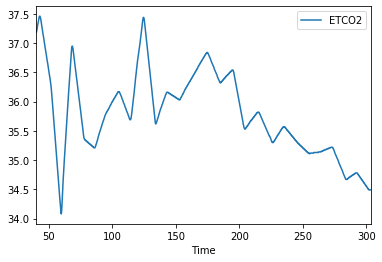

In [10]:
df.plot(x='Time', y = 'ETCO2')

## Medida de complejidad 1: A través de símbolos, se considerará el valor 1 en la representación simbólica cuando el valor de t-1 sea menor o igual a t y se considerará 0 en caso contrario

In [11]:
def complexOne(timeSeries):
    dis = []
    for index, value in enumerate(list(timeSeries)):
        if(index == 0):
            dis.append('1')#Por arbitrariedad se comienza con simbología 1
            prev_value = value
            continue
        if(prev_value <= value):
            dis.append('1')
        else:
            dis.append('0')
        prev_value = value
    return dis

## Método de discretización 1: 

In [12]:
def combinatoriaBinaria(n):
    result = []
    for i in range(pow(2,n)):
        result.append(bin(i)[2:].zfill(n))
    return result
# Python3 program to convert a list 
# of integers into a single integer 
def convert(list): 
    # multiply each integer element with its  
    # corresponding power and perform summation 
    res = sum(d * 10**i for i, d in enumerate(list[::-1])) 
    return(res)
def uneStringsDeLista(lista):
    string = ""
    for element in lista:
        string = string + element
    return string

## Método de discretización 2:

In [64]:
def obtienePatrones(listaBinarios, largoVentana):
    posVentana = 0
    patrones = []
    while(posVentana+largoVentana < len(listaBinarios)):
        patrones.append(uneStringsDeLista(listaBinarios[posVentana:posVentana+largoVentana]))
        posVentana = posVentana + 1
    #return patrones
    distribucion = []
    for posiblePatron in combinatoriaBinaria(largoVentana):
        #print("posible Patron: " + str(posiblePatron))
        contador = 0
        for patron in patrones:
            #print("patron a comparar: " + str(patron))
            if(str(posiblePatron) == str(patron)):
                contador = contador + 1
        distribucion.append(contador)
    return distribucion

In [62]:
len(obtienePatrones(complexOne(ncs1['CBFVR']), windowSize))

posible Patron: 00000
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
pat

patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000


patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011


patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00000


patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111


patron a comparar: 01111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00000


patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111


patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111


patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00110
patron a comparar: 01100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000


patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111


patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00001


patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111


patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111
patron a comparar: 11111


patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
posible Patron: 11010
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
pat

patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00001


patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00001
patron a comparar: 00011
patron a comparar: 00111
patron a comparar: 01111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11111
patron a comparar: 11110
patron a comparar: 11100
patron a comparar: 11000
patron a comparar: 10000
patron a comparar: 00000
patron a comparar: 00000
patron a comparar: 00000


32

# Iterador maestro

#### Posibles iteraciones:
##### 1.- Por señal
##### 2.- Por discretización
##### 3.- Por complejidad
##### 4.- Por parámetro de complejidad
##### 5.- Por tipo de entropía

In [75]:
%%R
discretize()

UsageError: %%R is a cell magic, but the cell body is empty. Did you mean the line magic %R (single %)?


In [15]:
dictioNCS1.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

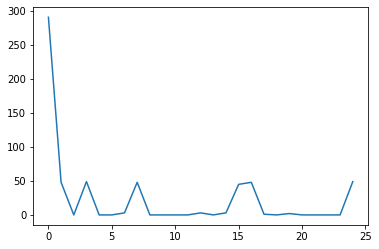

In [25]:
plt.plot(list(dictioNCS1.keys()), list(dictioNCS1.values()), label='NCS1')

Normocapnia - CBFVR: [291, 48, 0, 49, 0, 0, 3, 48, 0, 0, 0, 0, 3, 0, 3, 45, 48, 1, 0, 2, 0, 0, 0, 0, 49, 2, 0, 0, 48, 0, 45, 300]
Hypercapnia - CBFVR: [319, 39, 0, 41, 0, 0, 0, 41, 0, 0, 0, 0, 0, 0, 1, 42, 39, 2, 0, 0, 0, 0, 0, 2, 41, 0, 0, 2, 41, 2, 41, 661]
Normocapnia - CBFVR: [234, 53, 1, 56, 1, 0, 1, 57, 1, 0, 0, 0, 1, 0, 3, 55, 53, 5, 0, 2, 0, 0, 0, 1, 57, 2, 0, 1, 58, 1, 56, 191]
Hypercapnia - CBFVR: [319, 63, 3, 63, 3, 0, 6, 58, 3, 0, 0, 0, 6, 0, 4, 55, 64, 3, 0, 1, 0, 0, 0, 1, 64, 1, 0, 1, 59, 1, 56, 395]
Entropy: [1.98014347]
Normocapnia - ABP: [430, 38, 0, 39, 0, 0, 0, 41, 0, 0, 0, 0, 0, 0, 3, 38, 38, 1, 0, 2, 0, 0, 0, 0, 39, 2, 0, 0, 41, 0, 38, 235]
Hypercapnia - ABP: [630, 33, 1, 32, 1, 0, 1, 34, 1, 0, 0, 0, 1, 0, 0, 34, 33, 0, 0, 3, 0, 0, 0, 0, 32, 3, 0, 0, 34, 0, 33, 408]
Normocapnia - ABP: [362, 23, 0, 23, 0, 0, 0, 23, 0, 0, 0, 0, 0, 0, 0, 23, 23, 0, 0, 0, 0, 0, 0, 0, 23, 0, 0, 0, 23, 0, 23, 344]
Hypercapnia - ABP: [385, 60, 3, 59, 3, 0, 3, 56, 3, 0, 0, 0, 3, 0, 2, 55, 

Normocapnia - DCBFVL: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 985]
Hypercapnia - DCBFVL: [292, 41, 6, 40, 5, 1, 2, 46, 3, 2, 0, 1, 2, 0, 3, 45, 41, 5, 0, 8, 0, 0, 0, 2, 43, 6, 0, 1, 47, 1, 44, 627]
Normocapnia - DCBFVL: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 890]
Hypercapnia - DCBFVL: [257, 60, 2, 62, 2, 0, 10, 62, 2, 0, 0, 0, 9, 1, 2, 65, 61, 4, 0, 10, 0, 0, 0, 5, 63, 10, 0, 5, 64, 4, 66, 403]
Entropy: [1.98014347]
Normocapnia - PINXL: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 985]
Hypercapnia - PINXL: [0, 0, 0, 0, 0, 1, 1, 6, 0, 5, 1, 14, 0, 16, 8, 81, 0, 0, 1, 7, 5, 14, 15, 84, 0, 3, 18, 85, 3, 87, 82, 777]
Normocapnia - PINXL: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 890]
Hypercapnia - PINXL: [0, 3, 0, 10, 0, 6, 0, 25, 1, 4, 4, 26, 0, 15, 5, 103, 3, 7, 6, 15, 5, 24, 15, 8

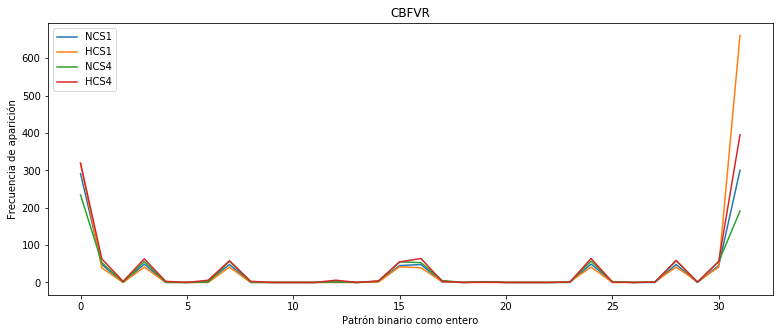

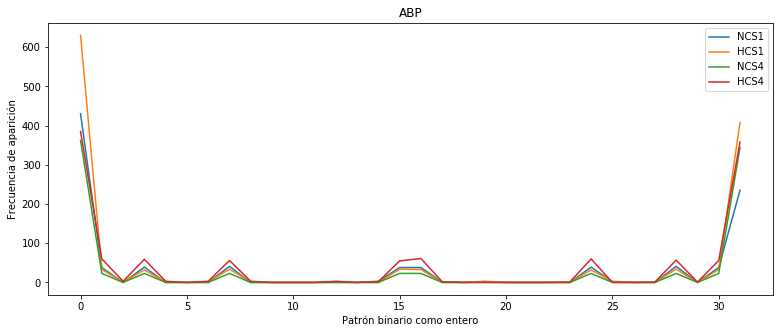

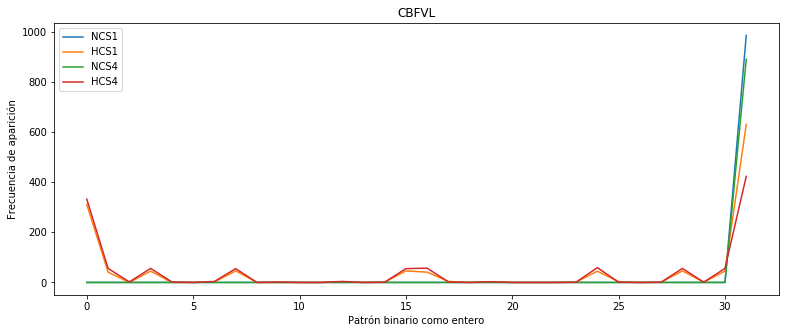

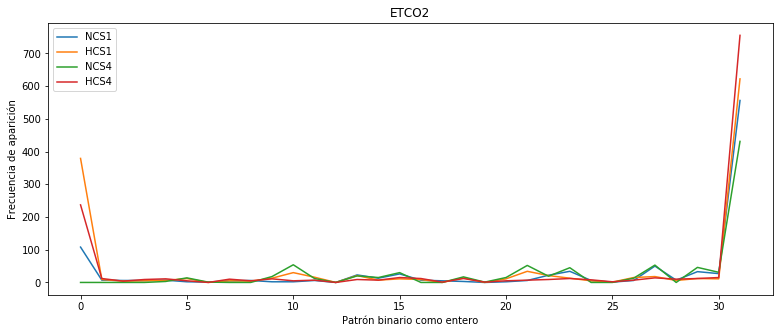

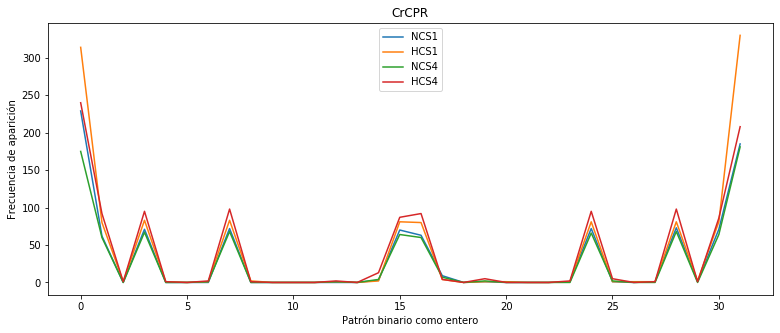

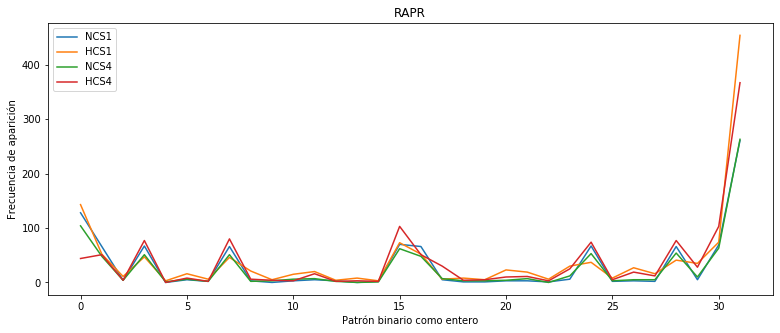

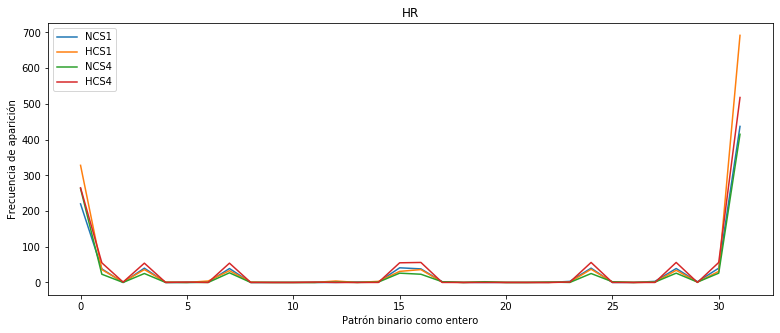

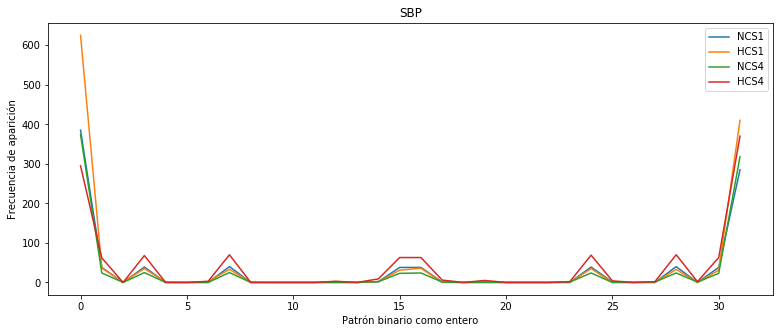

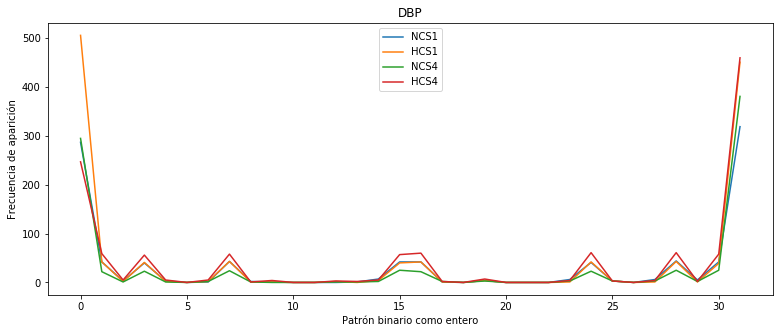

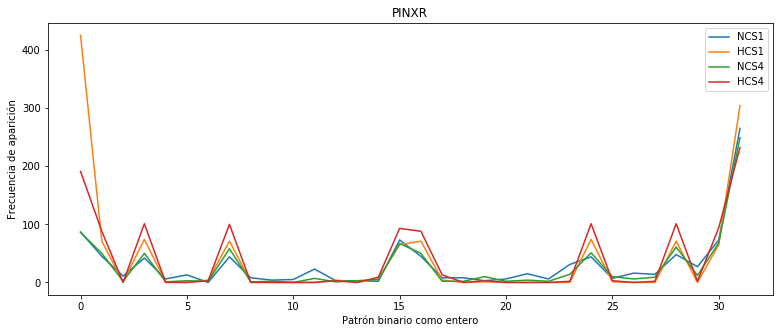

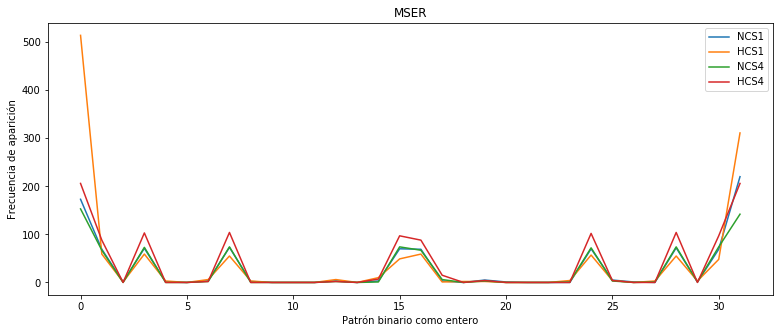

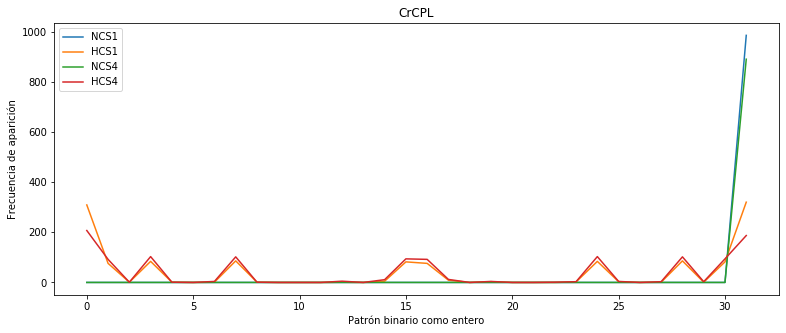

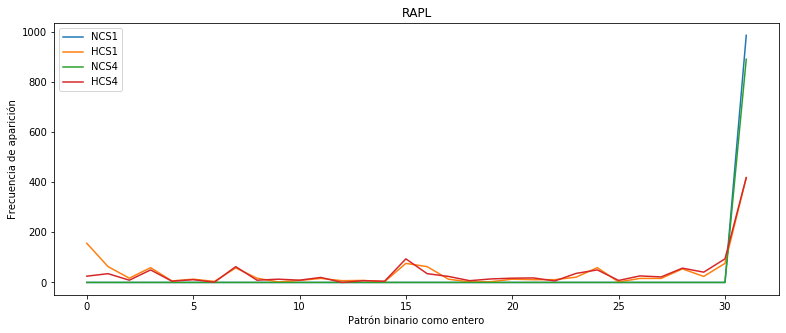

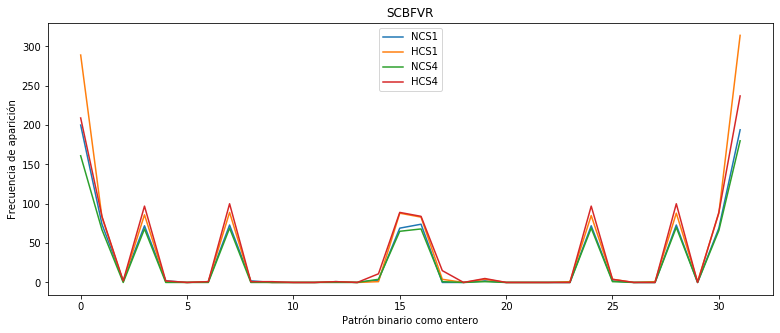

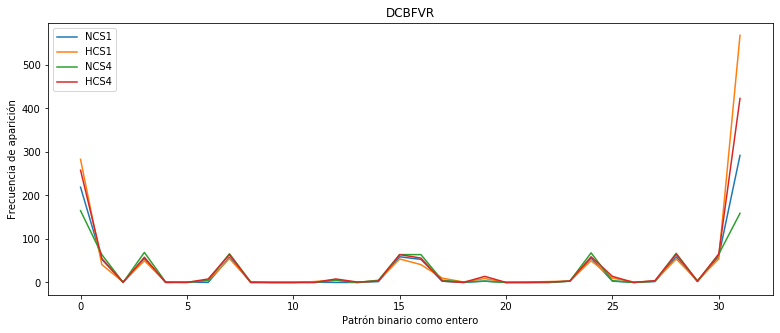

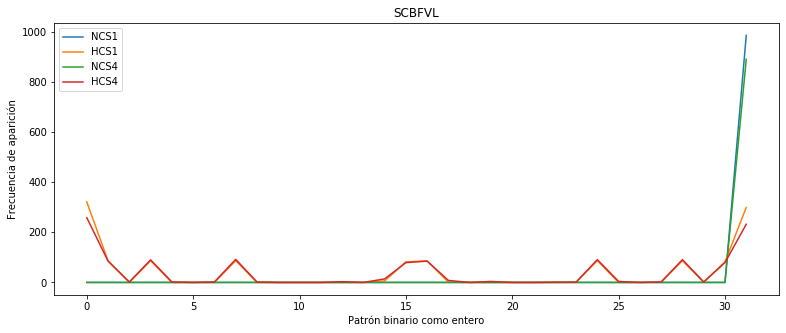

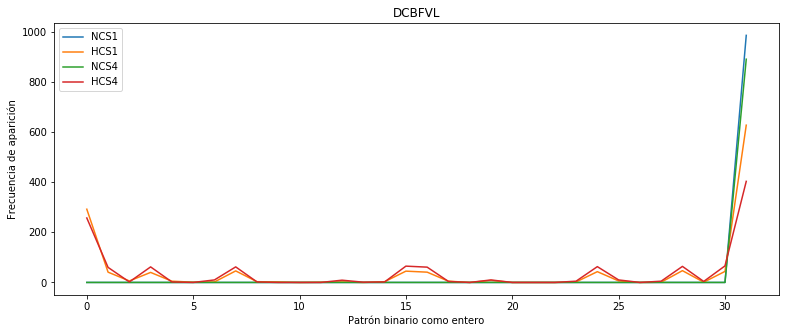

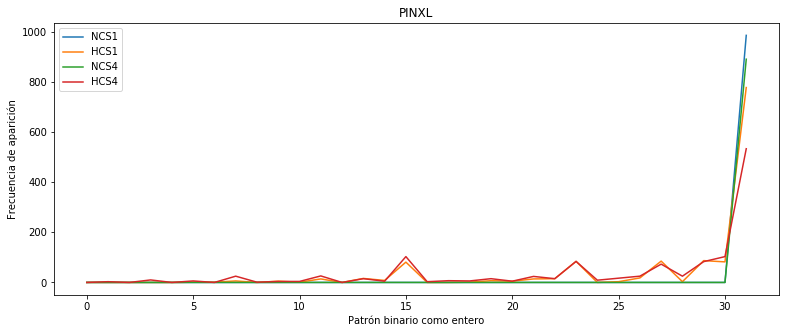

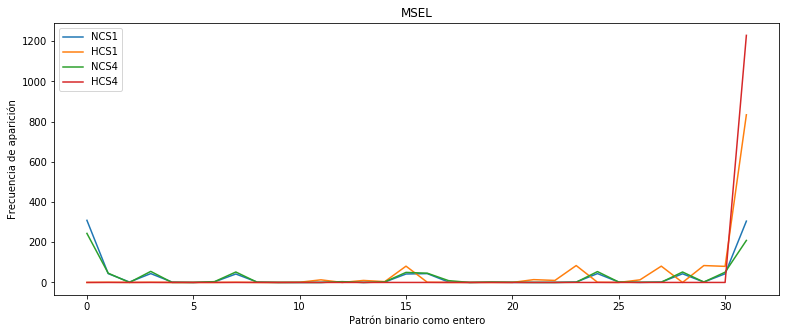

In [74]:
for index, column in enumerate(hcs1.columns[1:]):
    ##############################################
    ###Applying & showing complexity method One###
    ##############################################
    #######################
    #Parameters Definition#
    #######################
    windowSize = 5
    ###########
    #Execution#
    ###########
    ###Obtención de patron
    patronesNCS1 = obtienePatrones(complexOne(ncs1[column]), windowSize)
    patronesHCS1 = obtienePatrones(complexOne(hcs1[column]), windowSize)
    patronesNCS4 = obtienePatrones(complexOne(ncs4[column]), windowSize)
    patronesHCS4 = obtienePatrones(complexOne(hcs4[column]), windowSize)
    print("Normocapnia - " + column + ": " + str(patronesNCS1))
    print("Hypercapnia - " + column + ": " + str(patronesHCS1))
    print("Normocapnia - " + column + ": " + str(patronesNCS4))
    print("Hypercapnia - " + column + ": " + str(patronesHCS4))
    f, ax = plt.subplots(figsize=(13,5)) # set the size that you'd like (width, height)
    dictioNCS1 = dict(zip(range(len(patronesNCS1)), patronesNCS1))
    dictioHCS1 = dict(zip(range(len(patronesHCS1)), patronesHCS1))
    dictioNCS4 = dict(zip(range(len(patronesNCS4)), patronesNCS4))
    dictioHCS4 = dict(zip(range(len(patronesHCS4)), patronesHCS4))
    entropia = %R entropy(patronesNCS1)
    print("Entropy: " + str(entropia))
    #plt.bar(dictioNCS1.keys(), dictioNCS1.values(), width = 0.3, color='g')
    plt.plot(list(dictioNCS1.keys()), list(dictioNCS1.values()), label='NCS1')
    plt.plot(list(dictioHCS1.keys()), list(dictioHCS1.values()), label='HCS1')
    plt.plot(list(dictioNCS4.keys()), list(dictioNCS4.values()), label='NCS4')
    plt.plot(list(dictioHCS4.keys()), list(dictioHCS4.values()), label='HCS4')
    plt.legend()
    plt.xlabel('Patrón binario como entero')
    plt.ylabel('Frecuencia de aparición')
    plt.title(column)

## Instalación y configuración de ambiente R

In [27]:
from rpy2.robjects.packages import importr
# import rpy2's package module
import rpy2.robjects.packages as rpackages

# import R's utility package
utils = rpackages.importr('utils')

# select a mirror for R packages
utils.chooseCRANmirror(ind=1) # select the first mirror in the list

# R vector of strings
from rpy2.robjects.vectors import StrVector

# Installing the packages
utils.install_packages('ggplot2')
utils.install_packages('entropy')

rpy2.rinterface.NULL

In [93]:
patronesNCS1 = np.array(patronesNCS1)
patronesHCS1 = np.array(patronesHCS1)
%Rpush patronesNCS1
%Rpush patronesHCS1

In [98]:
%%R 
patronesNCS1

In [30]:
%R print(patronesHCS1)

array([  0,   1,   0,   1,   0,   0,   0,   1,   0,   0,   1,  13,   0,
        10,   4,  81,   1,   0,   0,   0,   0,  14,  10,  84,   1,   0,
        13,  81,   0,  84,  80, 834], dtype=int32)

In [99]:
%%R
library("entropy")
#x1 = runif(10000)
#hist(patronesNCS1, xlim=c(0,1), freq=FALSE)
x1 = entropy(patronesNCS1)
x2 = entropy(patronesHCS1)
y1 = discretize(patronesNCS1, numBins=10, r=c(0,1))
y2 = discretize(patronesHCS1, numBins=10, r=c(0,1))
first = entropy(y1)
second = entropy(y2)

In [100]:
%R x1

array([1.98014347])

In [70]:
%R x2

In [56]:
dictioHCS1

{0: 0,
 1: 1,
 2: 0,
 3: 1,
 4: 0,
 5: 0,
 6: 0,
 7: 1,
 8: 0,
 9: 0,
 10: 1,
 11: 13,
 12: 0,
 13: 10,
 14: 4,
 15: 81,
 16: 1,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 14,
 22: 10,
 23: 84,
 24: 1}

In [67]:
patronesNCS1

[309,
 44,
 2,
 44,
 2,
 0,
 3,
 42,
 2,
 0,
 0,
 0,
 3,
 0,
 2,
 42,
 44,
 2,
 0,
 1,
 0,
 0,
 0,
 2,
 44,
 2,
 0,
 2,
 43,
 2,
 43,
 305]

In [ ]:
"""
# 1.- NORMALIZAR ENTROPÍA


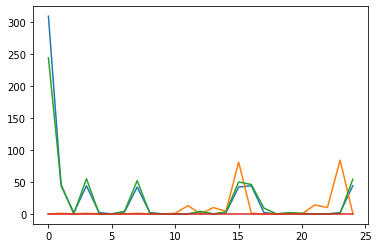

In [51]:
for index, column in enumerate(hcs1.columns[1:]):
    ##############################################
    ###Applying & showing complexity method One###
    ##############################################
    #######################
    #Parameters Definition#
    #######################
    windowSize = 5
    ###########
    #Execution#
    ###########
    ###Obtención de patron
    patronesNCS1 = obtienePatrones(complexOne(ncs1[column]), windowSize)
    patronesHCS1 = obtienePatrones(complexOne(hcs1[column]), windowSize)
    patronesNCS4 = obtienePatrones(complexOne(ncs4[column]), windowSize)
    patronesHCS4 = obtienePatrones(complexOne(hcs4[column]), windowSize)
    print("Normocapnia - " + column + ": " + str(patronesNCS1))
    print("Hypercapnia - " + column + ": " + str(patronesHCS1))
    print("Normocapnia - " + column + ": " + str(patronesNCS4))
    print("Hypercapnia - " + column + ": " + str(patronesHCS4))
    f, ax = plt.subplots(figsize=(13,5)) # set the size that you'd like (width, height)
    dictioNCS1 = dict(zip(range(len(patronesNCS1)), patronesNCS1))
    dictioHCS1 = dict(zip(range(len(patronesHCS1)), patronesHCS1))
    dictioNCS4 = dict(zip(range(len(patronesNCS4)), patronesNCS4))
    dictioHCS4 = dict(zip(range(len(patronesHCS4)), patronesHCS4))
    
    %%R
    library("entropy")
    #x1 = runif(10000)
    #hist(patronesNCS1, xlim=c(0,1), freq=FALSE)
    x1 = entropy(patronesNCS1)
    x2 = entropy(patronesHCS1)
    y1 = discretize(patronesNCS1, numBins=10, r=c(0,1))
    y2 = discretize(patronesHCS1, numBins=10, r=c(0,1))
    first = entropy(y1)
    second = entropy(y2)
    
    #plt.bar(dictioNCS1.keys(), dictioNCS1.values(), width = 0.3, color='g')
    plt.plot(list(dictioNCS1.keys()), list(dictioNCS1.values()), label='NCS1')
    plt.plot(list(dictioHCS1.keys()), list(dictioHCS1.values()), label='HCS1')
    plt.plot(list(dictioNCS4.keys()), list(dictioNCS4.values()), label='NCS4')
    plt.plot(list(dictioHCS4.keys()), list(dictioHCS4.values()), label='HCS4')
    plt.legend()
    plt.xlabel('Patrón binario como entero')
    plt.ylabel('Frecuencia de aparición')
    plt.title(column)